In [1]:
# installing the required packages.
!pipenv install pandas seaborn matplotlib textblob scikit-learn nltk numpy

Installing pandas...
Resolving pandas...
[    ] Installing...
Installation Succeeded
[    ] Installing pandas...
[    ] Installing pandas...

Installing seaborn...
Resolving seaborn...
[    ] Installing...
Installation Succeeded
[    ] Installing seaborn...
[    ] Installing seaborn...

Installing matplotlib...
Resolving matplotlib...
[    ] Installing...
Installation Succeeded
[    ] Installing matplotlib...
[    ] Installing matplotlib...

Installing textblob...
Resolving textblob...
[    ] Installing...
Installation Succeeded
[    ] Installing textblob...
[    ] Installing textblob...

Installing scikit-learn...
Resolving scikit-learn...
[    ] Installing...
Installation Succeeded
[    ] Installing scikit-learn...
[    ] Installing scikit-learn...

Installing nltk...
Resolving nltk...
[    ] Installing...
Installation Succeeded
[    ] Installing nltk...
[    ] Installing nltk...

Installing numpy...
Resolving numpy...
[    ] Installing...
Installation Succeeded
[    ] Installing num

In [2]:
# importing packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import pickle

In [3]:
# loading the dataset.
df = pd.read_csv('../datasets\\sentiment_analysis.csv')
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [4]:
texts = df['text']
texts.head()

0                What a great day!!! Looks like dream.
1       I feel sorry, I miss you here in the sea beach
2                                       Don't angry me
3    We attend in the class just for listening teac...
4                    Those who want to go, let them go
Name: text, dtype: object

In [5]:
print(texts.loc[texts.index[0]])

What a great day!!! Looks like dream.


In [6]:
blob1 = TextBlob( texts.loc[texts.index[0]] )
blob2 = TextBlob( texts.loc[texts.index[2]] )

In [7]:
print( blob1.sentiment )
print( blob2.sentiment )

Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=-0.5, subjectivity=1.0)


In [8]:
# importing stopwords.
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df.shape

(499, 7)

In [10]:
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [11]:
df['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [12]:
# mapping each sentiment with a number.
mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
df['result'] = df['sentiment'].map(mapping)
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,result
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,1
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,1
2,2017,8,18,night,Don't angry me,negative,Facebook,-1
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,-1
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,-1


(array([134.,   0.,   0.,   0.,   0.,   0.,   0., 199.,   0.,   0.,   0.,
          0.,   0.,   0., 166.]),
 array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
        -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
         1.        ]),
 <BarContainer object of 15 artists>)

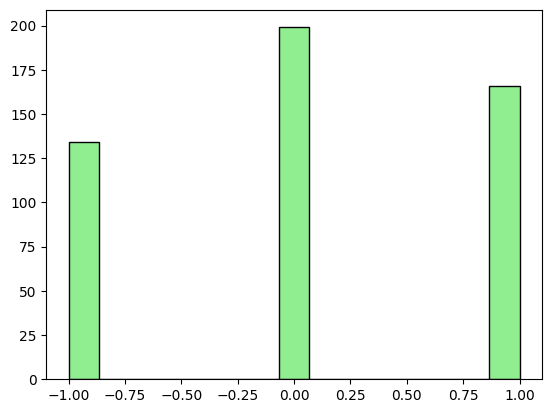

In [13]:
# ploting the count of sentiments.
plt.hist(df['result'], color='lightgreen', ec='black', bins=15)

In [14]:
port_stem = PorterStemmer()

In [15]:
# Removing stopwords and stemming the words in each data.
def stemming( content ):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) 
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
# calling the stemming function.
df['stemmed_content'] = df['text'].apply(stemming)

In [17]:
df.head(10)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,result,stemmed_content
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,1,great day look like dream
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,1,feel sorri miss sea beach
2,2017,8,18,night,Don't angry me,negative,Facebook,-1,angri
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,-1,attend class listen teacher read slide nonsenc
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,-1,want go let go
5,2016,11,22,night,"Its night 2 am, feeling neutral",neutral,Facebook,0,night feel neutral
6,2017,12,28,morning,2 am feedings for the baby are fun when he is ...,positive,Facebook,1,feed babi fun smile coo
7,2017,12,28,noon,Soooo high,neutral,Instagram,0,soooo high
8,2019,10,28,night,Both of you,neutral,Twitter,0,
9,2018,5,28,morning,Today first time I arrive in the boat. Its ama...,positive,Facebook,1,today first time arriv boat amaz journey


In [18]:
x = df['stemmed_content']
y = df['result']

In [19]:
# INtializing vectorizer and ferforming feature extraction and saving it.
vector = TfidfVectorizer()
pickle.dump(vector, open('../models\\vectorizer.pkl', 'wb'))
x = vector.fit_transform(x)

In [20]:
# slpliting datasets.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=2)
print(x.shape,x_train.shape, x_test.shape)
print(y.shape,y_train.shape, y_test.shape)

(499, 1137) (349, 1137) (150, 1137)
(499,) (349,) (150,)


In [21]:
print(x_train.get_shape())
print(x_test.get_shape())

(349, 1137)
(150, 1137)


In [22]:
# training and saving the model.
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
pickle.dump(model, open('../models\\Logistic_Regression.pkl', 'wb'))

In [23]:
#prediction on test data.
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.5866666666666667
